# Google Playstore Data

### Complete Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline


# 2. Data Loading and Exploration and Cleaning

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in dataframe

In [5]:
# hide all warning runtime
import warnings
warnings.filterwarnings('ignore')

### let's see exact columns names which can be easily copied later on from google playstore Dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### let's have a look on the shape of the dataset

In [7]:
df.shape

(10841, 13)

### Not enough let's have a look on the columns and their data types using detailed into function

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observations

In [9]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# Observation:

### let's clean the size columns first

In [10]:
# check for null values
df['Size'].isnull().sum()

0

### No Null Values, we are good to go

In [11]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### There are Serveral uniques Values in the Size column we have to first make the unit into one common unit from M and K to Bytes.and then remove the M and K from the values and convert them into numeric data type

In [12]:
# find the values in Size column which has 'Mbs' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [13]:
# find the values in size column which has "Kbs" in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [14]:
# find the values in size columns which has 'Varies' with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [15]:
# Total Values in Size column
df['Size'].value_counts().sum()

10841

In [16]:
# taking sum of all values in size columns which has 'M','K' and 'Varies with device' in it
8830+316+1695

10841

### Let's convert the M and K units bytes and then remove the M and K from the values and convert them into numeric data type.

In [17]:
# convert the size columns to numeric by multiplying the values with 1024 if it has 'K' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
  # add function detail here
  '''
  This function will convert the size column to numeric by multiplaying the values with 1024 if it and 1024*1024 if it has 'M' in it
  '''

  if isinstance(size,str):
    if 'k' in size:
        return float (size.replace('k','')) * 1024
    elif 'M' in size:
        return float(size.replace("M",'')) *1024 * 1024
    elif 'varies with device' in size:
        return np.nan
  return size

df['Size'] = df['Size'].apply(convert_size)

In [18]:
# rename the column name 'size' to 'size_in_bytes'
df.rename(columns={"Size":"Size_in_bytes"},inplace=True)

In [19]:
# Convert the column to numeric type if necessary
df["Size_in_bytes"] = pd.to_numeric(df["Size_in_bytes"], errors="coerce")

# Check for any non-numeric values after conversion
non_numeric_values = df[df["Size_in_bytes"].isna()]["Size_in_bytes"]
if not non_numeric_values.empty:
    print("Non-numeric values found in 'Size_in_bytes' column:", non_numeric_values)

# Proceed with the division operation if the column contains only numeric values
df["Size_in_Mb"] = df["Size_in_bytes"] / (1024 * 1024)


Non-numeric values found in 'Size_in_bytes' column: 37      NaN
42      NaN
52      NaN
67      NaN
68      NaN
73      NaN
85      NaN
88      NaN
89      NaN
92      NaN
102     NaN
107     NaN
109     NaN
117     NaN
118     NaN
139     NaN
142     NaN
143     NaN
144     NaN
145     NaN
146     NaN
149     NaN
152     NaN
157     NaN
162     NaN
172     NaN
173     NaN
179     NaN
187     NaN
188     NaN
189     NaN
191     NaN
192     NaN
193     NaN
201     NaN
202     NaN
203     NaN
204     NaN
207     NaN
208     NaN
211     NaN
214     NaN
215     NaN
222     NaN
226     NaN
228     NaN
229     NaN
230     NaN
236     NaN
239     NaN
240     NaN
245     NaN
253     NaN
259     NaN
261     NaN
264     NaN
265     NaN
268     NaN
269     NaN
274     NaN
282     NaN
284     NaN
285     NaN
286     NaN
292     NaN
294     NaN
297     NaN
315     NaN
320     NaN
327     NaN
330     NaN
335     NaN
336     NaN
338     NaN
339     NaN
340     NaN
341     NaN
342     NaN
344     NaN


Let's have a look on the Installs Column

In [20]:
# Check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
# let's have a values counts
df['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",908
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [22]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [23]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

In [24]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','')if ',' in str(x) else x)
# convert the install column to numeric (integers because this is thw number if installs/count)
df['Installs']= df['Installs'].apply(lambda x: int(x))

Let's verify if the dtypes been changes and the + and , sign has been removed

In [25]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [26]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

we can generate a new columns based on the installation values,which will be helpful in our analysis

In [27]:
df['Installs'].max() # this will show value counts of the column


1000000000

In [28]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1,0,10,1000,10000,100000,1000000,10000000,10000000000]
labels = ['no','very low','low','Moderate','More than moderate','High','very High','Top Notch']
df['Installs_category']= pd.cut(df['Installs'],bins = bins,labels=labels)

In [29]:
df['Installs_category'].value_counts() # check the value counts of the new column

,count
Installs_category,
low,2162
High,2118
very High,2004
More than moderate,1648
Moderate,1531
Top Notch,828
very low,535
no,15


Let's have a look on the Price column

In [30]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [31]:
df['Price'].isnull().sum()

0

No Null Values

In [32]:
df['Price'].value_counts() # check the value counts of 'Price' column

,count
Price,
0,10041
$0.99,148
$2.99,129
$1.99,73
$4.99,72
$3.99,63
$1.49,46
$5.99,30
$2.49,26


In [33]:
# counts the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [34]:
# This code counts the number of values in 'Price' columns which Contains 0 but does not Contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

In [35]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [36]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [37]:
# Using f string to print the min, max and average price of the apps
print(f"Min price is:{df['Price'].min()}$")
print(f"Max price is:{df['Price'].max()}$")
print(f"Average price is:{df['Price'].mean()}$")

Min price is:0.0$
Max price is:400.0$
Average price is:1.0272733142699015$


# Descriptive Statistics

In [38]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


Let's have a look on the missing values in the dataset

In [39]:
df.isnull().sum() # this will show thw number of null values in each column

,0
App,0
Category,1
Rating,1474
Reviews,0
Size_in_bytes,1695
Installs,0
Type,1
Price,0
Content Rating,0
Genres,1


In [40]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

,0
Size_in_bytes,1695
Size_in_Mb,1695
Rating,1474
Current Ver,8
Android Ver,2
Category,1
Type,1
Genres,1
App,0
Reviews,0


In [41]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

4877

In [42]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

,0
Size_in_bytes,15.635089
Size_in_Mb,15.635089
Rating,13.596532
Current Ver,0.073794
Android Ver,0.018448
Category,0.009224
Type,0.009224
Genres,0.009224
App,0.000000
Reviews,0.000000


Let's plot the missing values in the dataset

<Axes: >

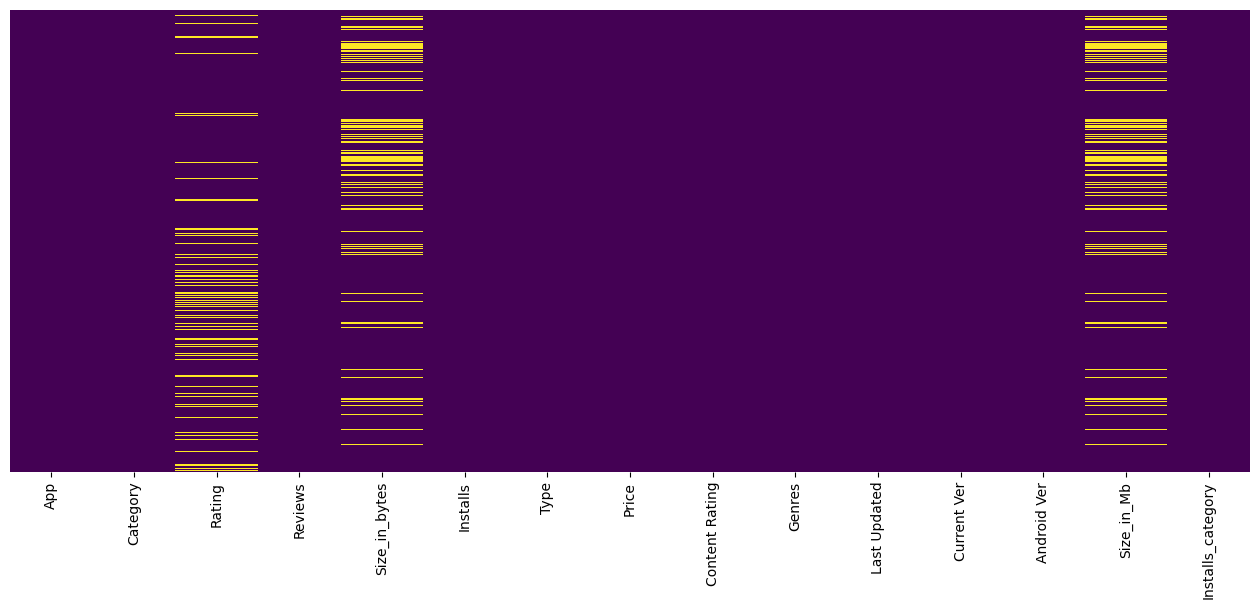

In [43]:
# make a figure size
plt.figure(figsize=(16,6))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There is another way,Let's plot the missing values by percentage

Text(0.5, 1.0, 'percentage of Missing Values in each Column')

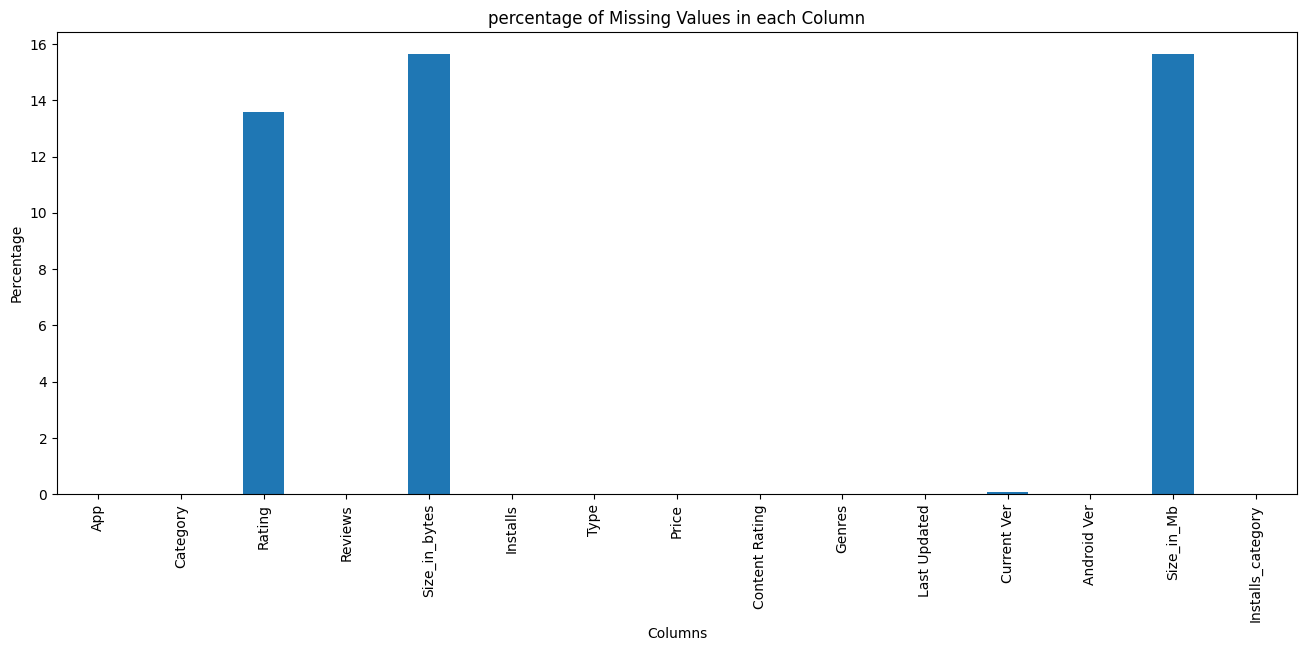

In [44]:
# make figure size
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum() / len(df) *100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('percentage of Missing Values in each Column')


Text(0.5, 1.0, 'Percentage of Missing Values in each Column Without Rating column')

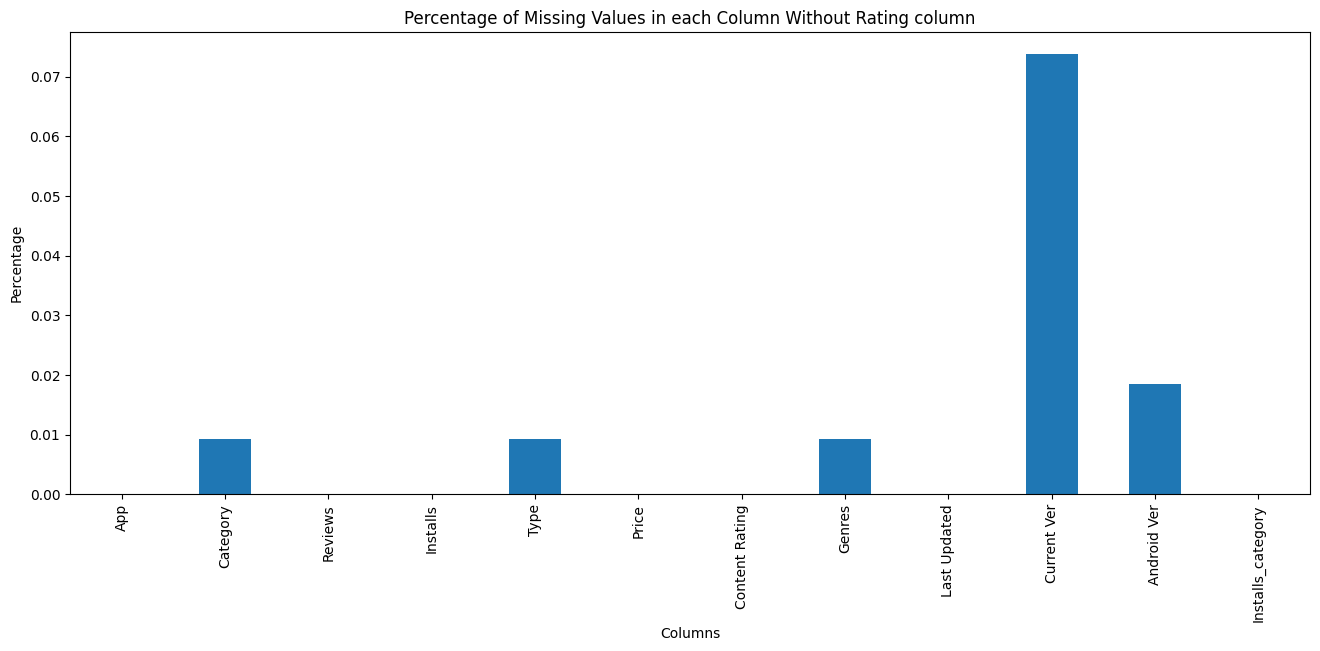

In [45]:
plt.figure(figsize=(16,6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null value by their percentage in each column
plt.xlabel('Columns') # add the x-axis_labels
plt.ylabel("Percentage") # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column Without Rating column')  # add the title for the plot

In [46]:
df.isnull().sum().sort_values(ascending=False) # This will show the number of null values in each column in descending order

,0
Size_in_bytes,1695
Size_in_Mb,1695
Rating,1474
Current Ver,8
Android Ver,2
Category,1
Type,1
Genres,1
App,0
Reviews,0


In [47]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

,0
Size_in_bytes,15.635089
Size_in_Mb,15.635089
Rating,13.596532
Current Ver,0.073794
Android Ver,0.018448
Category,0.009224
Type,0.009224
Genres,0.009224
App,0.000000
Reviews,0.000000


# Dealing With the nissing Values

Let's run the correlations

In [48]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

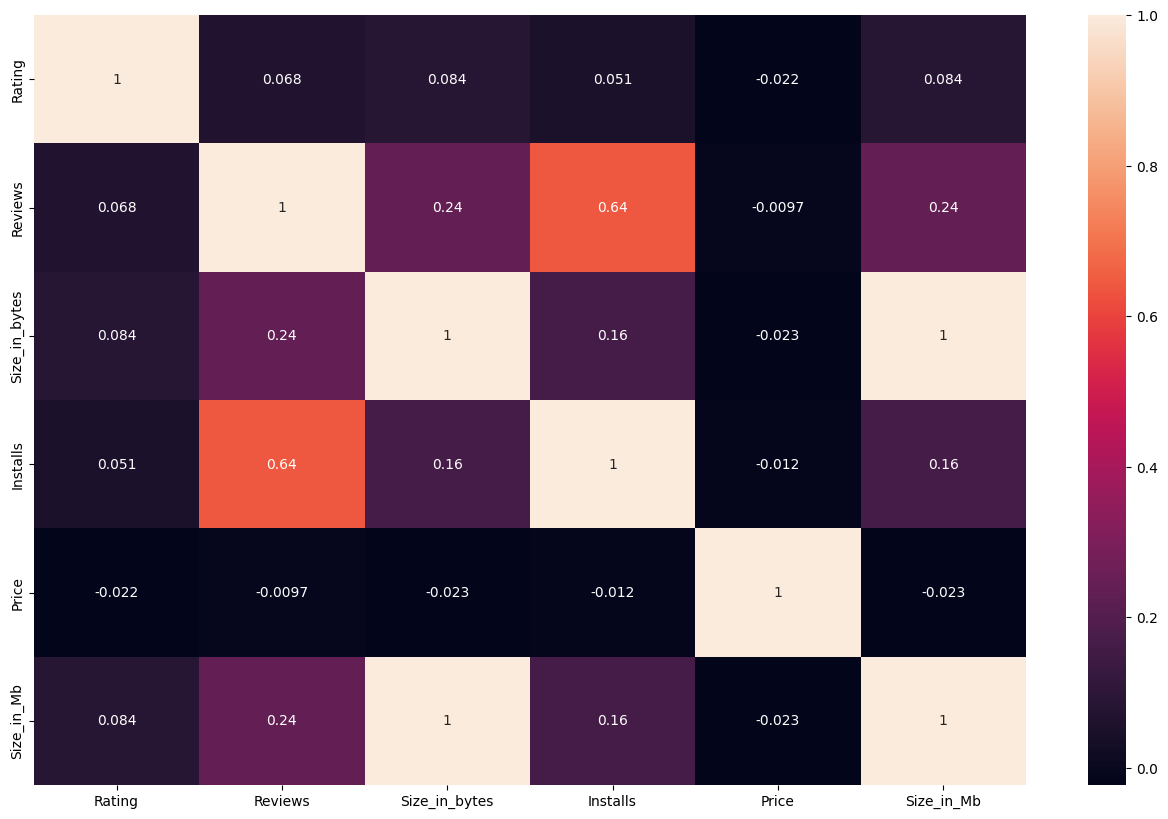

In [49]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16,10)) # make figure size
numeric_cols = ['Rating','Reviews','Size_in_bytes','Installs','Price','Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(),annot=True) # Plot the correlation matrix

In [50]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix


,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [51]:
# we can calculate the pearson correlation coefficient using scipy as well as follows
# this id to install scipy if you have not done it before
# pip install scipy
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson,s R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r,_ = stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])
print(f"Pearson,s R between Reviews and Installs:{pearson_r:4f}")

Pearson,s R between Reviews and Installs:0.626187


In [52]:
# length before removing null values
print(f"Length of the dataframe before removing null values:{len(df)}")


Length of the dataframe before removing null values:10841


In [53]:
# remove the rows having values in the 'current Ver', 'Android Var' , 'Category , 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type' , 'Genres'],inplace =True)

In [54]:
# length after removing null values
print(f"Length of the dataframe after removing null values:{len(df)}")

Length of the dataframe after removing null values:10829


# we have remove 12 rows having null values in the `Current Ver`, `Android Ver`,`Category`,`Type` and `Genres` columns.

In [55]:
# Let's Check the null values again
df.isnull().sum().sort_values(ascending=False)

,0
Size_in_bytes,1694
Size_in_Mb,1694
Rating,1469
App,0
Category,0
Reviews,0
Installs,0
Type,0
Price,0
Content Rating,0


In [56]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [57]:
# use.groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [58]:
df['Rating'].isnull().sum()

1469

In [59]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

,count
Installs_category,
low,880
very low,453
Moderate,88
More than moderate,31
no,14
High,3
very High,0
Top Notch,0


Text(7, 3.5, 'Null values: 0')

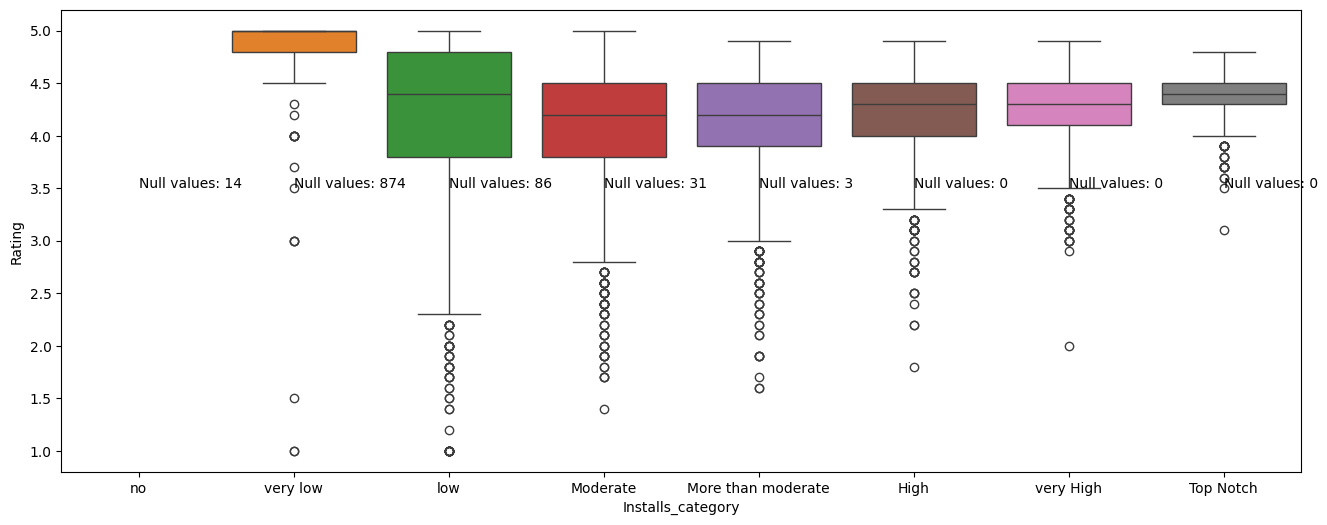

In [60]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16,6)) # Make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category

plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

Let's check if there is any similar link with Reviews as well

In [61]:
# in which install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

,count
Installs_category,
no,0
very low,0
low,0
Moderate,0
More than moderate,0
High,0
very High,0
Top Notch,0


# There are No Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

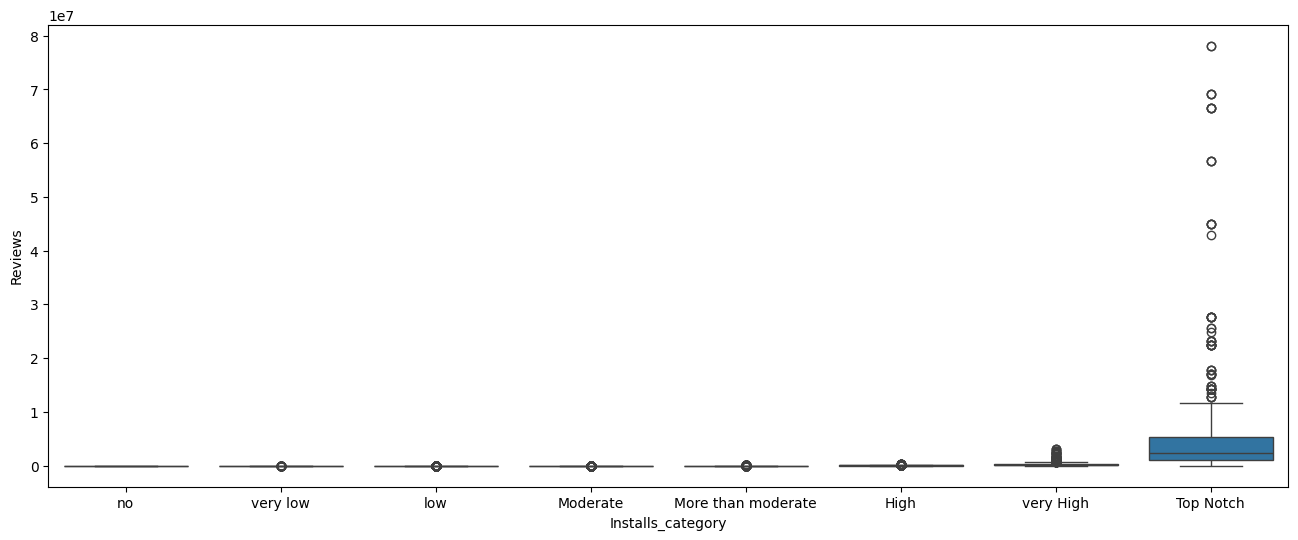

In [62]:
# Let's plot the same plots for Reviews column as well
plt.figure(figsize=(16,6)) # make figure Size
sns.boxplot(x='Installs_category', y='Reviews', data=df) # plot the boxplot


<Axes: xlabel='Installs_category', ylabel='Reviews'>

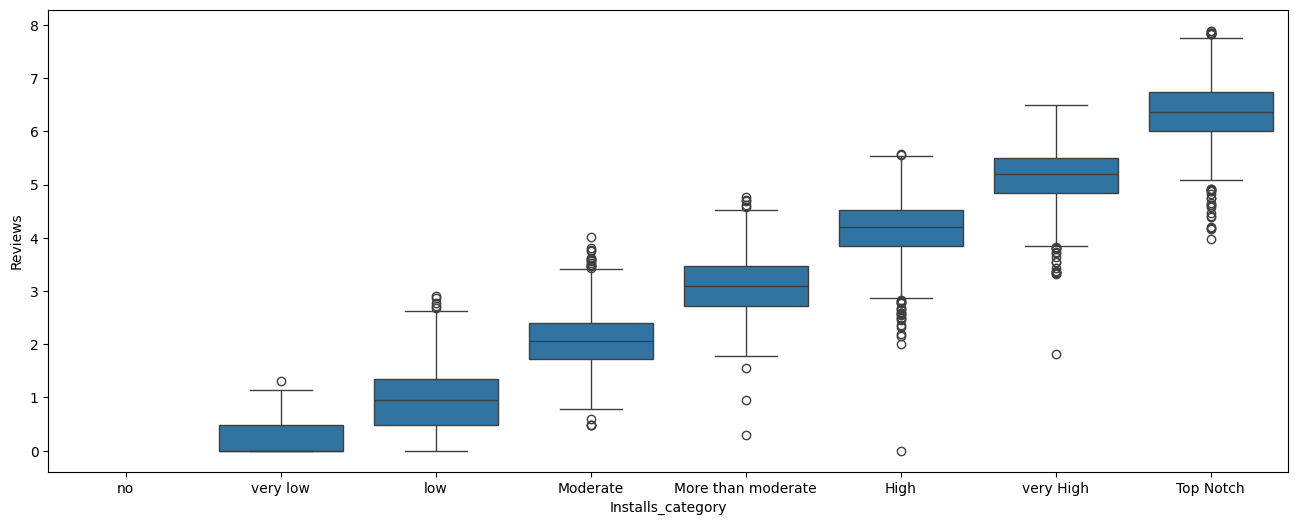

In [63]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']), data=df) # plot the boxplot


We also draw the Scatter plot of the Rating and Review columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

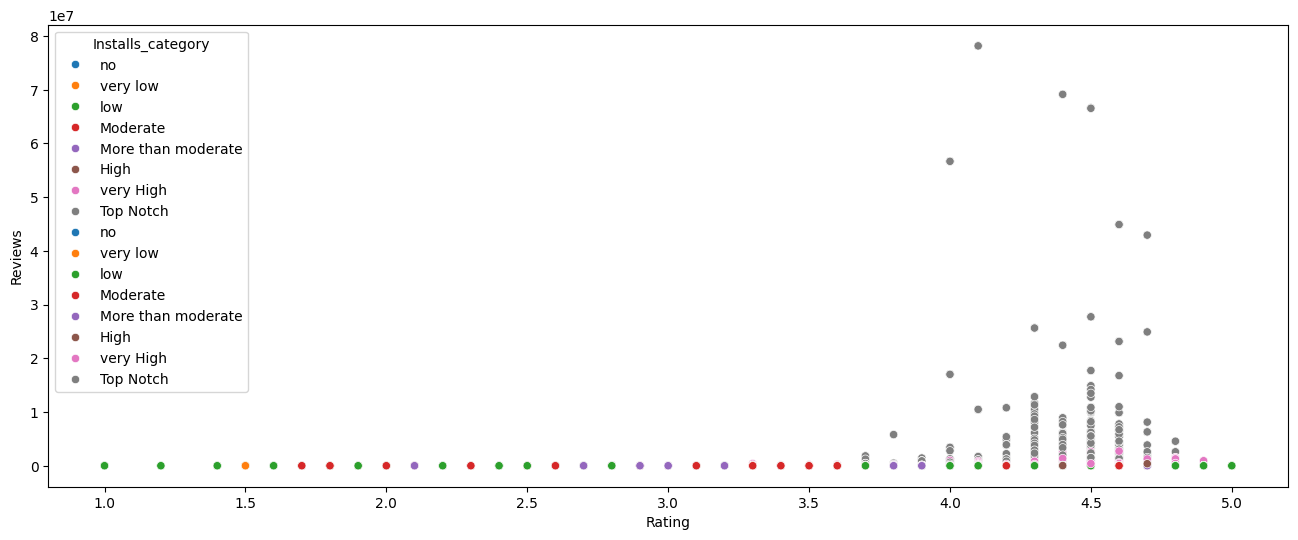

In [64]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16,6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot


It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

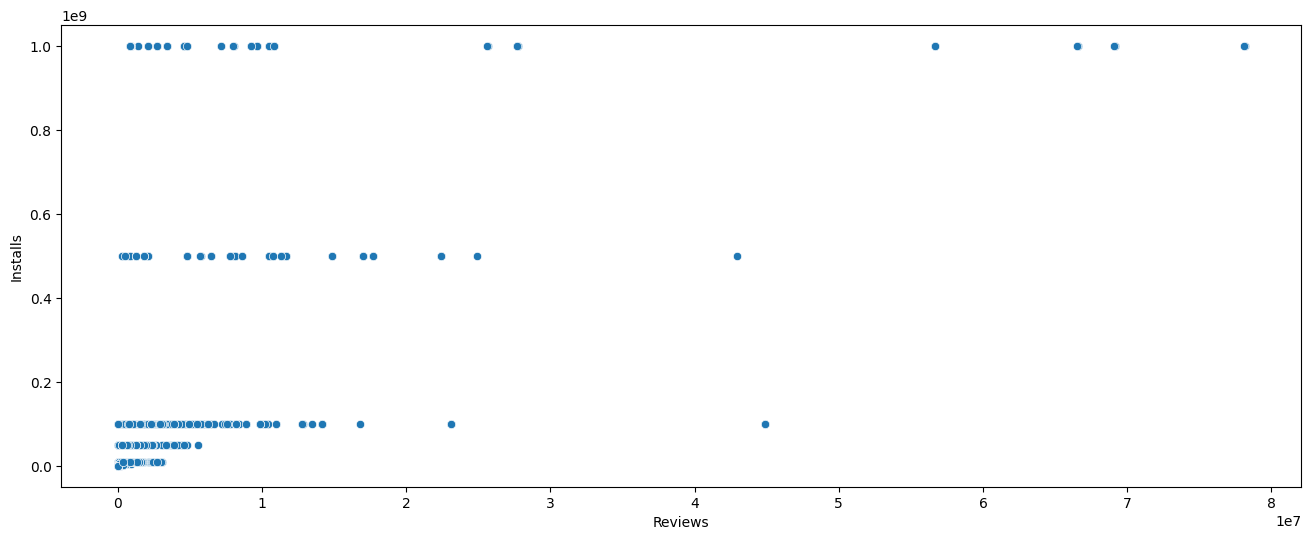

In [65]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

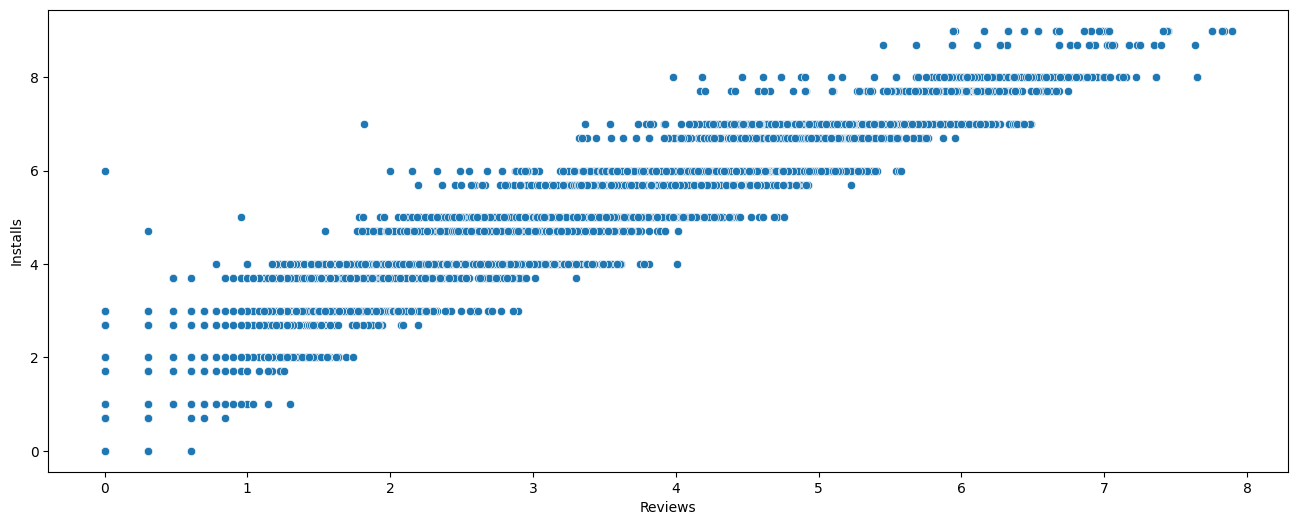

In [66]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

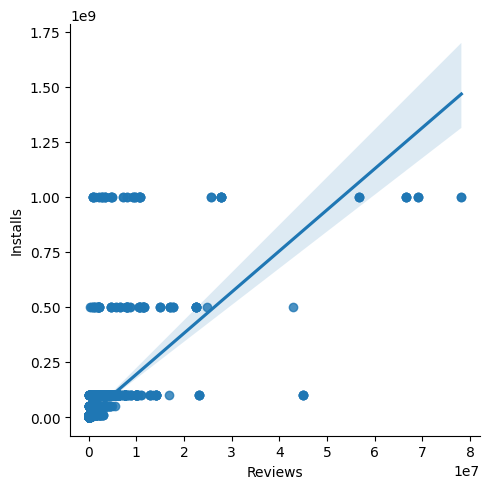

In [67]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

# Duplicates

In [68]:
# find duplicates
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [69]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

let's check for number of duplicates in each column using a for loop and printing the output

In [70]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


This means that the only better way to find duplicates is to check for whole data

In [71]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


Find and watch all duplicates if they are real!

In [72]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,More than moderate
3083,365Scores - Live Scores,SPORTS,4.6,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,very High
5415,365Scores - Live Scores,SPORTS,4.6,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,very High


Remove Duplicates

In [73]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [74]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


Now we have removed 483 duplicates from the dataset. and have 10346 rows left

# Which category has the highest number of apps?

In [75]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

,count
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,386
LIFESTYLE,373
COMMUNICATION,366


#  Which category has the highest number of installs?

In [76]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452271905
FAMILY,10041632405
PHOTOGRAPHY,9721247655
TRAVEL_AND_LOCAL,6361887146
VIDEO_PLAYERS,6222002720


# Which category has the highest number of reviews?

In [77]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

,Reviews
Category,
GAME,1415536650
COMMUNICATION,601273552
SOCIAL,533576829
FAMILY,396771746
TOOLS,273181033
PHOTOGRAPHY,204297410
VIDEO_PLAYERS,110380188
PRODUCTIVITY,102554498
SHOPPING,94931162


# Which category has the highest rating?

In [78]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

,Rating
Category,
EVENTS,4.435556
ART_AND_DESIGN,4.377049
EDUCATION,4.375969
BOOKS_AND_REFERENCE,4.347458
PERSONALIZATION,4.333117
PARENTING,4.300000
GAME,4.281285
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.261450


<Axes: xlabel='Rating', ylabel='Density'>

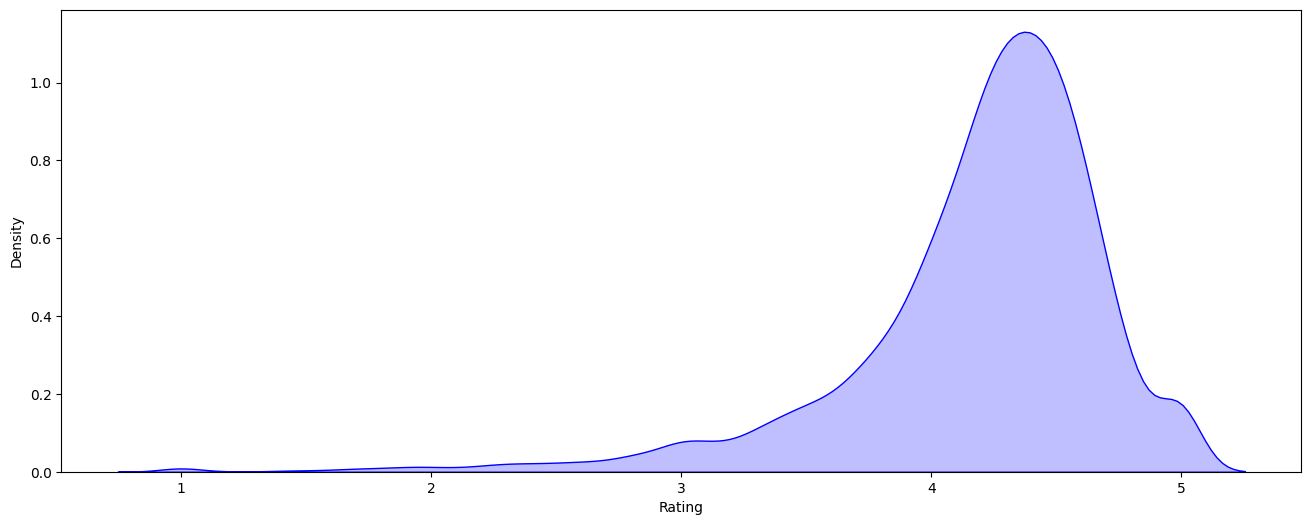

In [79]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

In [80]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


<Axes: xlabel='Installs', ylabel='Price'>

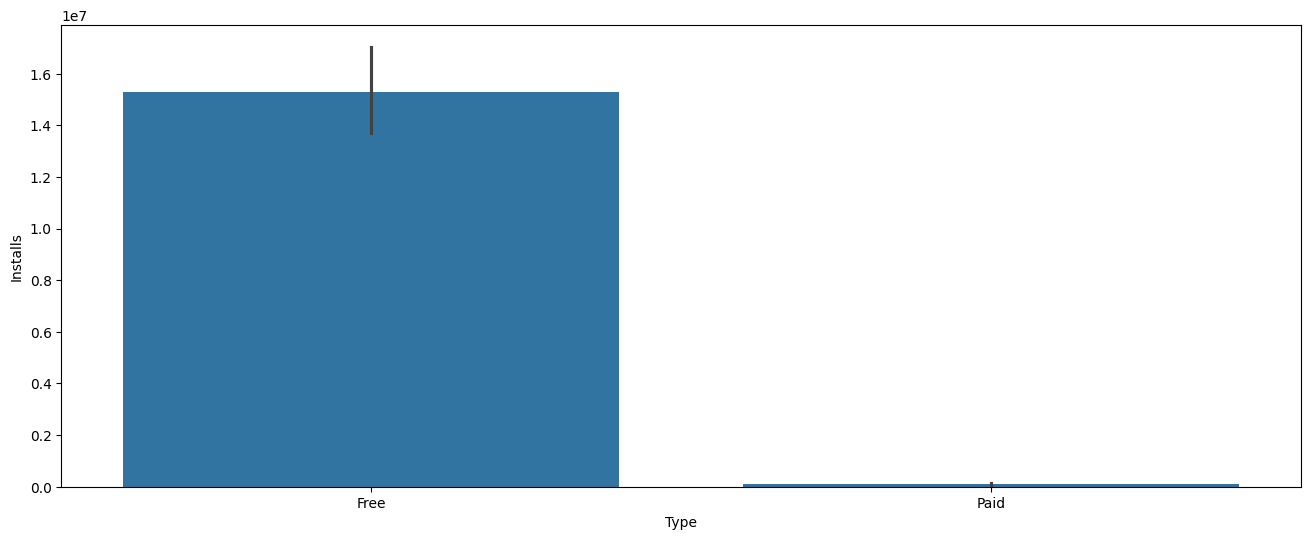

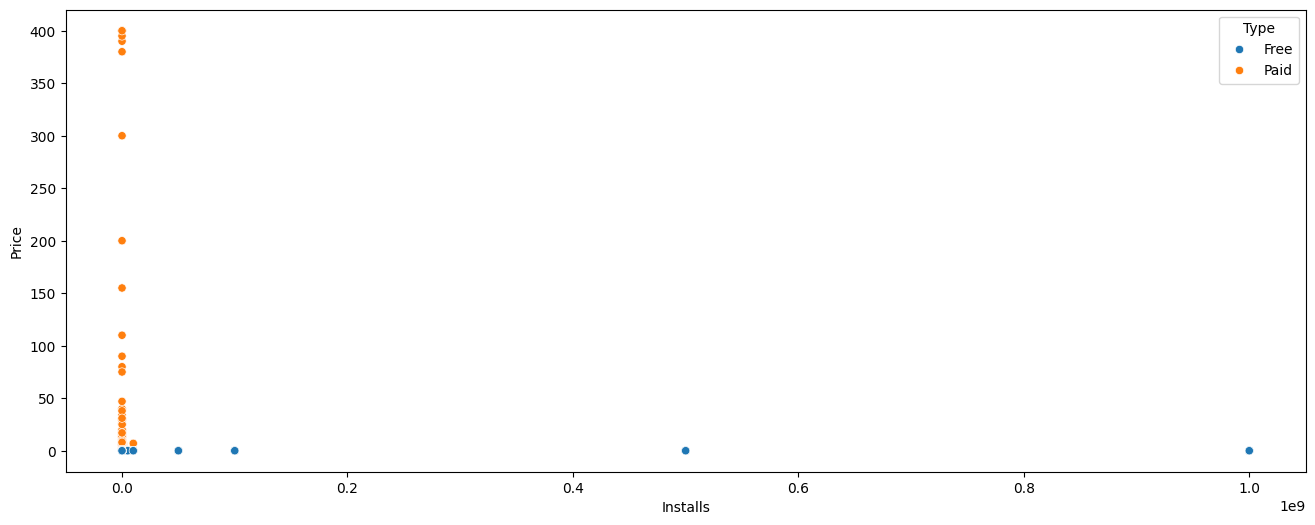

In [81]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

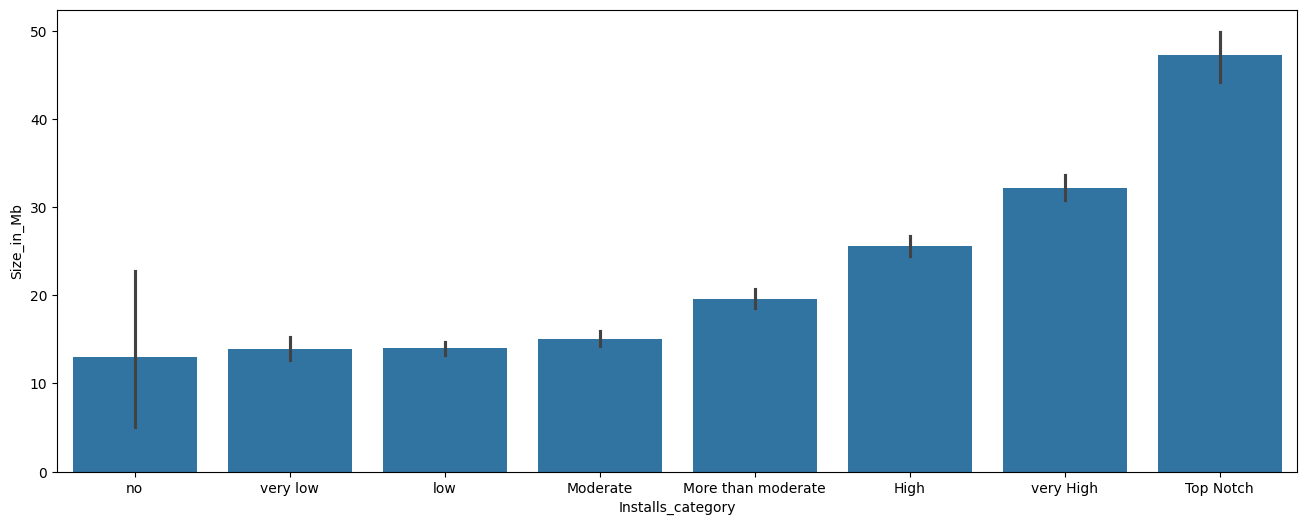

In [82]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

In [83]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

,count
Content Rating,
Everyone,8372
Teen,1146
Mature 17+,447
Everyone 10+,376
Adults only 18+,3
Unrated,2


<Axes: xlabel='Content Rating', ylabel='Installs'>

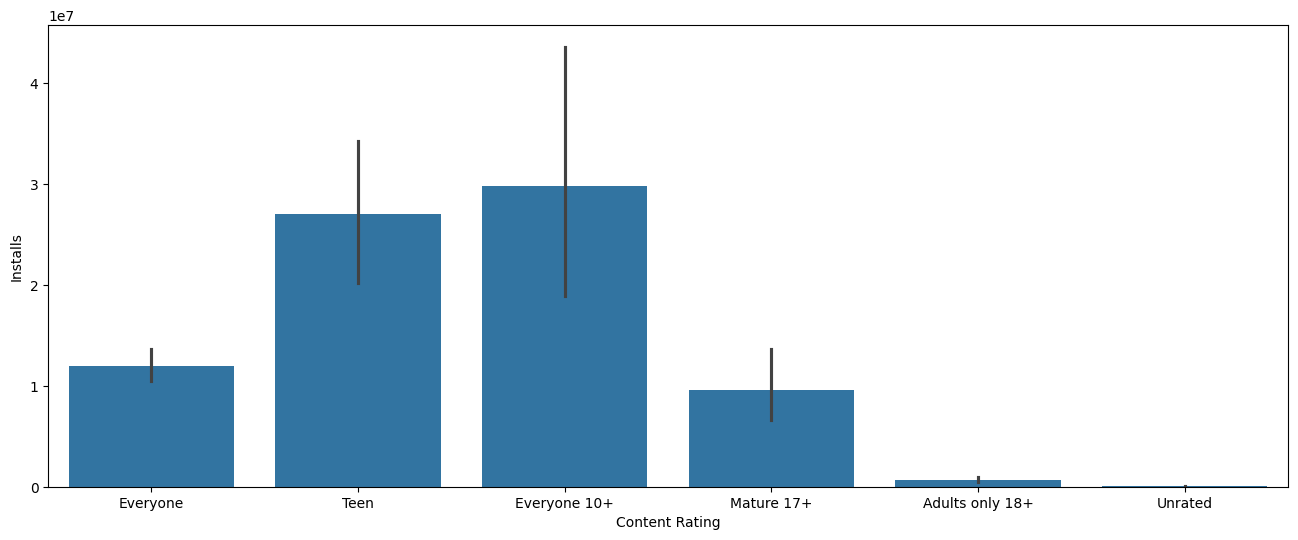

In [84]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [85]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

,count
Category,
FAMILY,1498
TOOLS,833
GAME,595
BUSINESS,412
PRODUCTIVITY,396
MEDICAL,390
FINANCE,355
LIFESTYLE,337
COMMUNICATION,325


<Axes: xlabel='App', ylabel='Rating'>

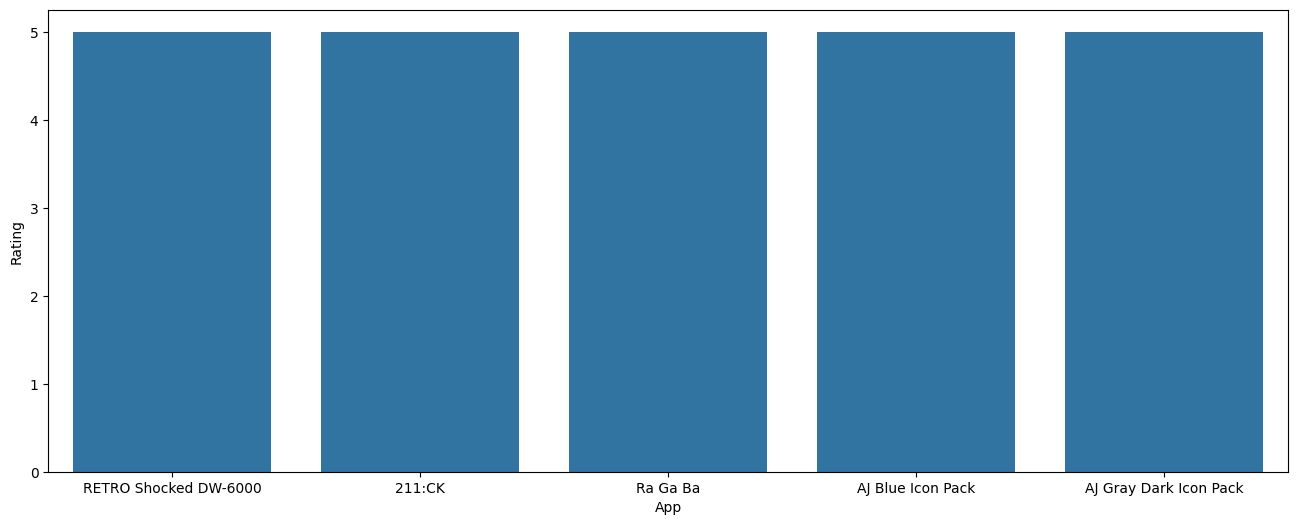

In [86]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [87]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,very low


<Axes: xlabel='App', ylabel='Rating'>

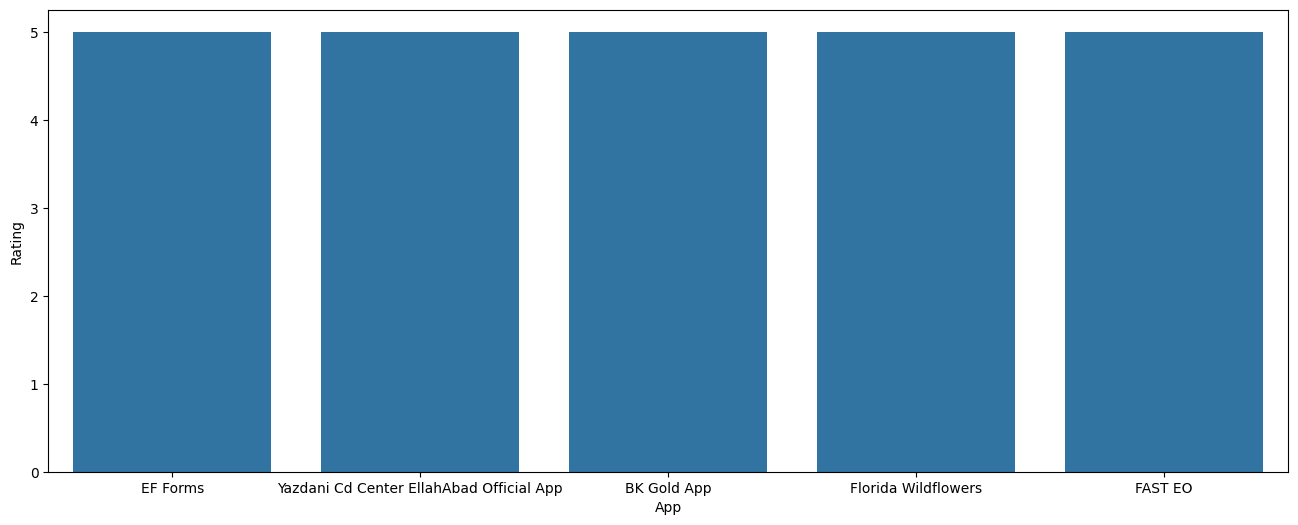

In [88]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [89]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9290,EF Forms,BUSINESS,5.0,2,24117248.0,50,Free,0.0,Everyone,Business,"July 24, 2018",1.29,4.4 and up,23.0,low
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3984588.8,500,Free,0.0,Everyone,Entertainment,"January 12, 2018",2.0,4.0 and up,3.8,low
6398,BK Gold App,FINANCE,5.0,4,11534336.0,50,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up,11.0,low
10629,Florida Wildflowers,FAMILY,5.0,5,72351744.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,69.0,low
9659,FAST EO,EVENTS,5.0,1,NaN,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,NaN,very low


<Axes: xlabel='App', ylabel='Reviews'>

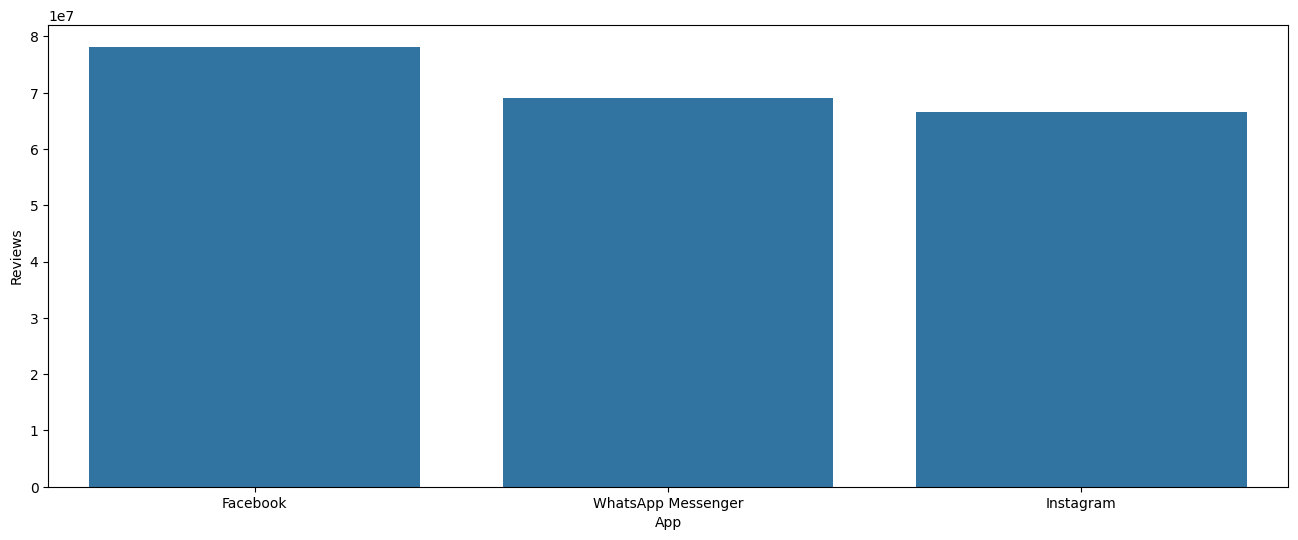

In [90]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [91]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

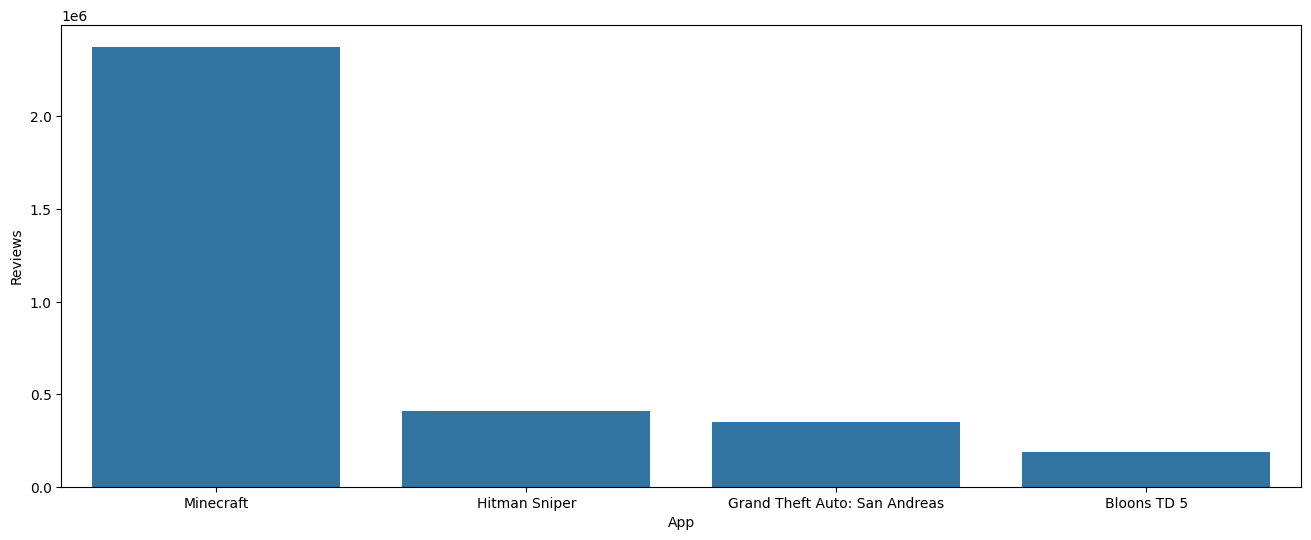

In [92]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot